In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import seaborn as sns


In [2]:
df=pd.read_csv("../Cleaned-Data.csv")

In [3]:
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [4]:
print("Tamaño del dataset", df.shape)
print("Filas:",df.shape[0],"\nColumnas:",df.shape[1])

Tamaño del dataset (316800, 27)
Filas: 316800 
Columnas: 27


Verificar que ningun dato se encuentre nulo

In [5]:
df.isnull().sum()

Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
Country                    0
dtype: int64

informacion de los tipos de datos por columna

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

In [7]:
print("Número de valores que toma la característica Country ->")
df['Country'].unique()


Número de valores que toma la característica Country ->


array(['China', 'Italy', 'Iran', 'Republic of Korean', 'France', 'Spain',
       'Germany', 'UAE', 'Other-EUR', 'Other'], dtype=object)

Remover columna de pais ya que no es relevante

In [8]:
df.drop("Country",axis=1,inplace=True)


In [9]:
df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
0,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,0,0,0,0,1
1,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,0,0,0,1,0
2,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,0,0,1,0,0
3,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,1,0,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
316796,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
316797,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
316798,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


Analisis para cada carateristica

array([[<Axes: title={'center': 'Fever'}>,
        <Axes: title={'center': 'Tiredness'}>,
        <Axes: title={'center': 'Dry-Cough'}>,
        <Axes: title={'center': 'Difficulty-in-Breathing'}>,
        <Axes: title={'center': 'Sore-Throat'}>],
       [<Axes: title={'center': 'None_Sympton'}>,
        <Axes: title={'center': 'Pains'}>,
        <Axes: title={'center': 'Nasal-Congestion'}>,
        <Axes: title={'center': 'Runny-Nose'}>,
        <Axes: title={'center': 'Diarrhea'}>],
       [<Axes: title={'center': 'None_Experiencing'}>,
        <Axes: title={'center': 'Age_0-9'}>,
        <Axes: title={'center': 'Age_10-19'}>,
        <Axes: title={'center': 'Age_20-24'}>,
        <Axes: title={'center': 'Age_25-59'}>],
       [<Axes: title={'center': 'Age_60+'}>,
        <Axes: title={'center': 'Gender_Female'}>,
        <Axes: title={'center': 'Gender_Male'}>,
        <Axes: title={'center': 'Gender_Transgender'}>,
        <Axes: title={'center': 'Severity_Mild'}>],
       [<Axes: 

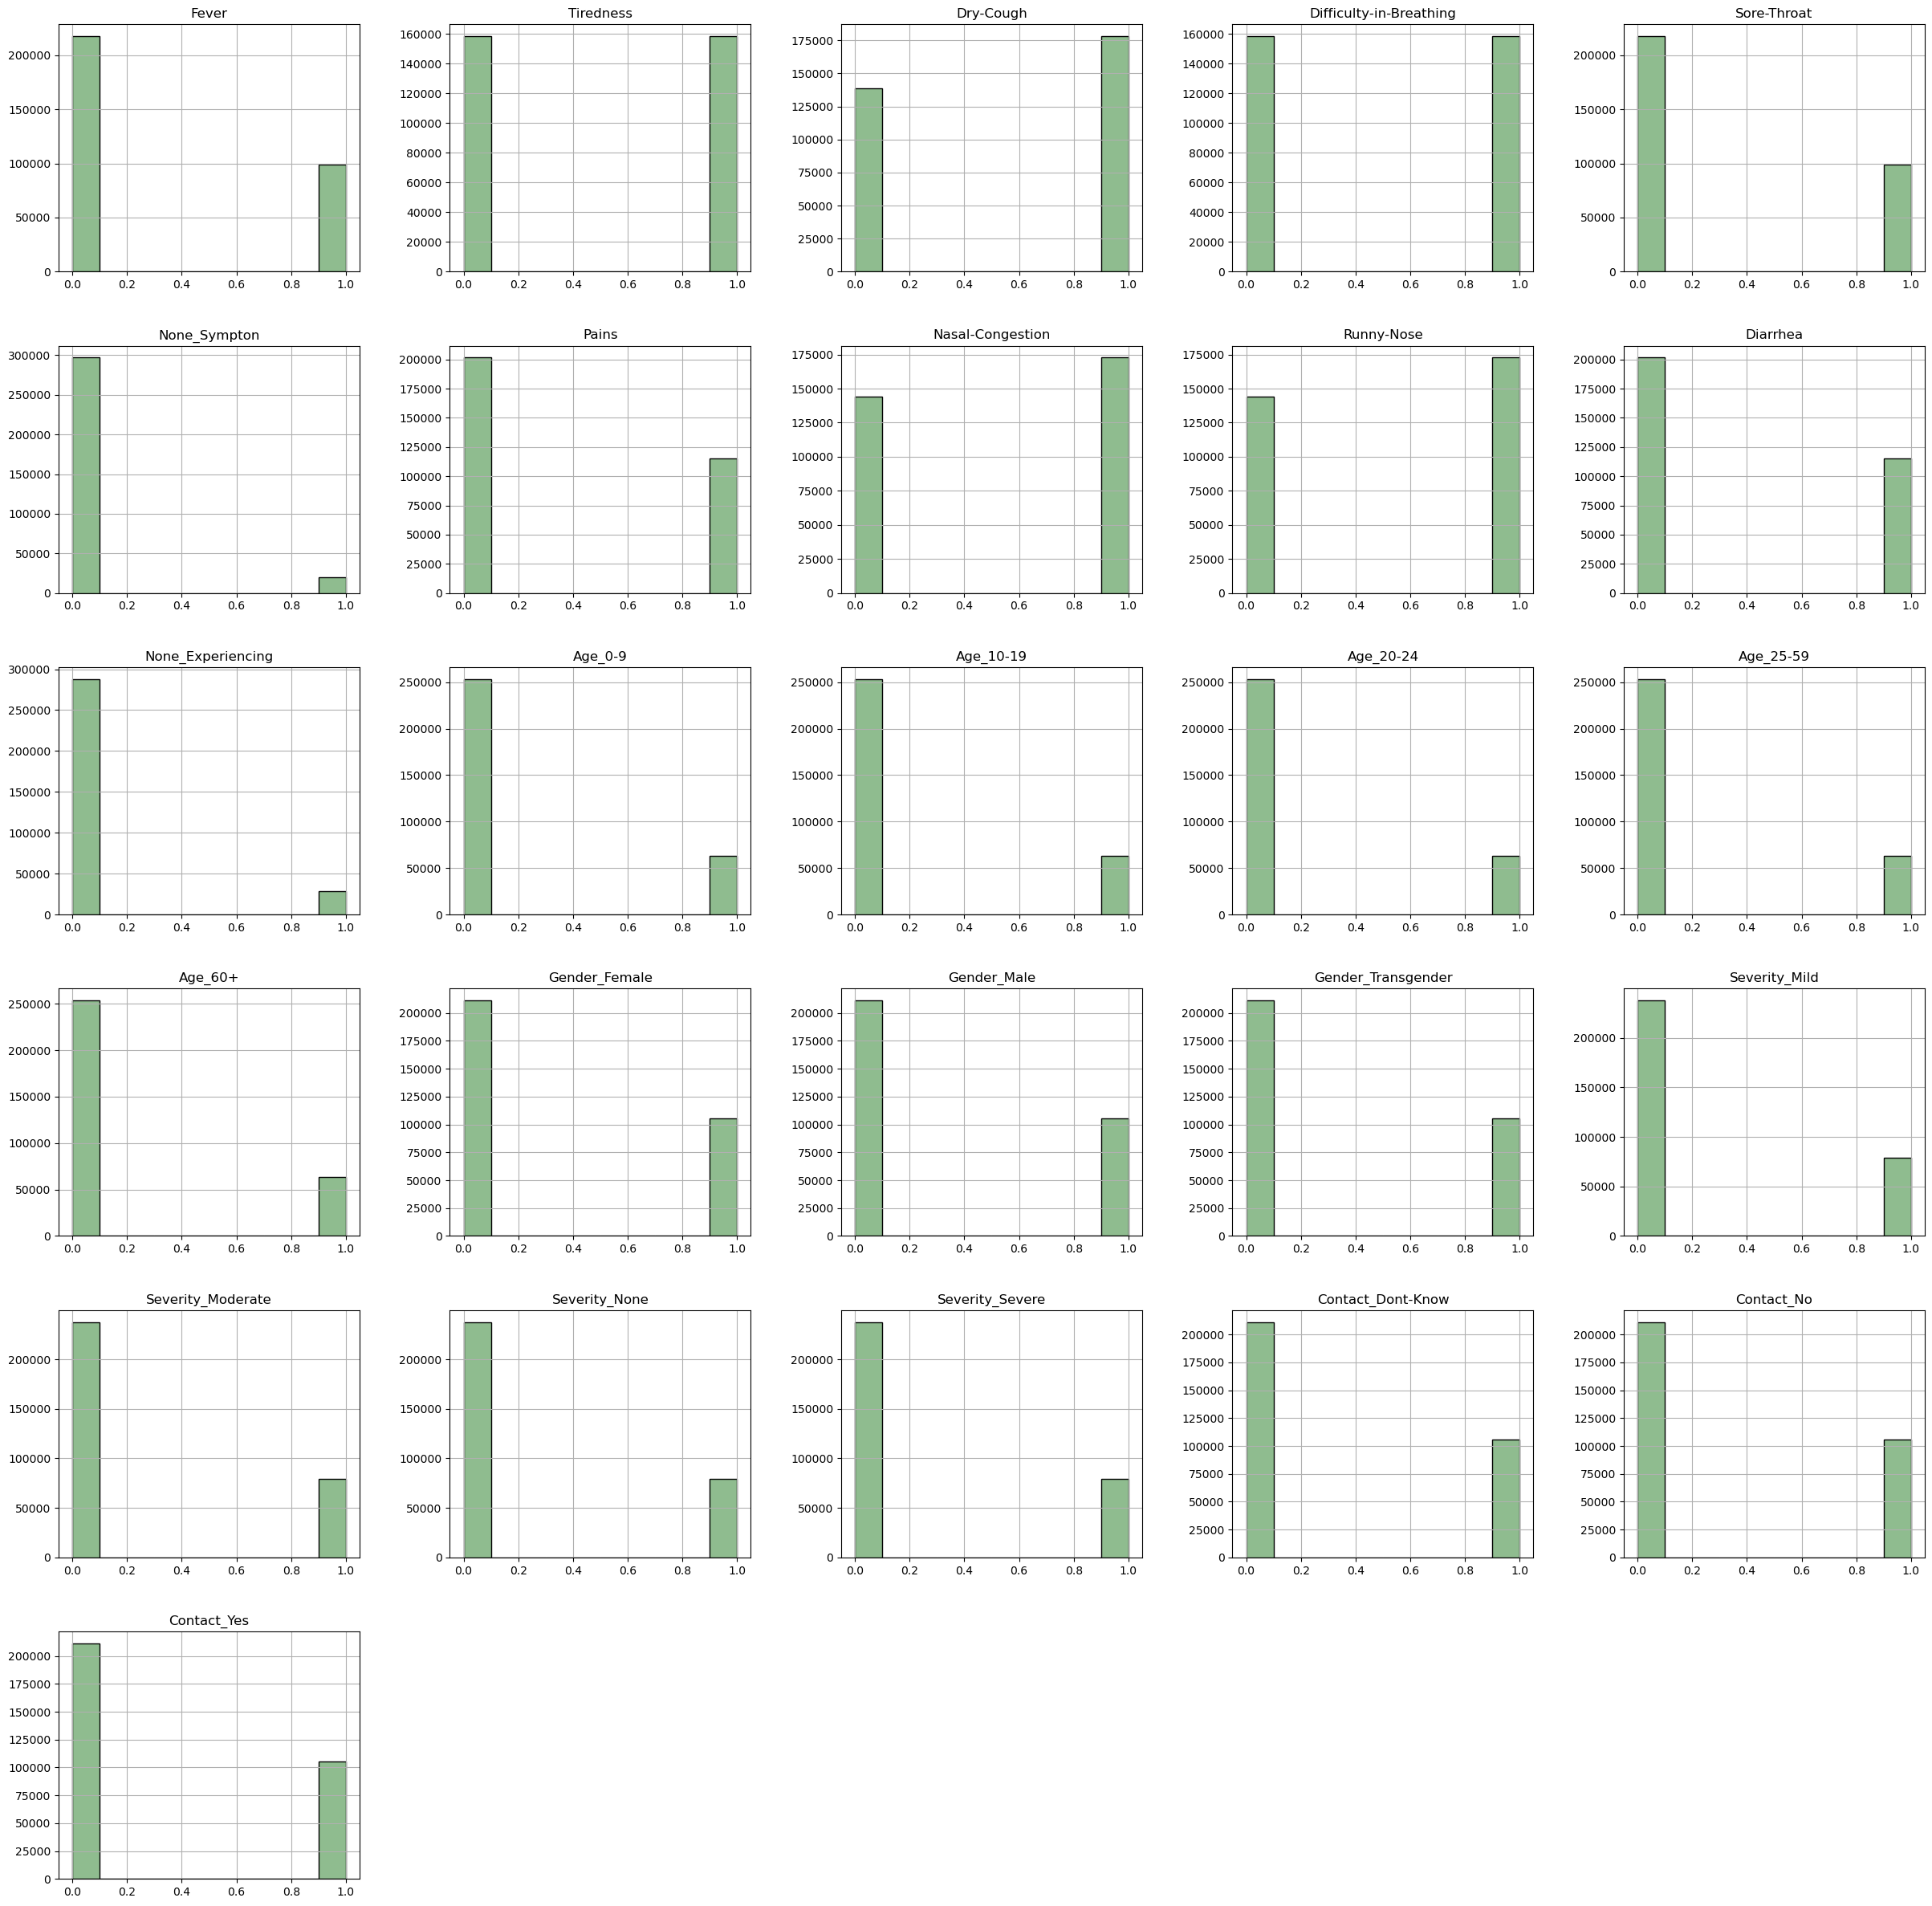

In [10]:
df.hist(figsize=(30,30), edgecolor='black', color='darkseagreen')


Se realiza limpieza del data set y concatenacion para saber si se esta infectado separando la severidad Solo puede estar en None, Mild, Moderate y Severe

In [11]:
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=pd.to_numeric(df[col],errors='coerce')
        df[col]=df[col].fillna(df[col].median)

In [12]:
df['Severity_None'].replace({1:'None',0:'No'},inplace =True)
df['Severity_Mild'].replace({1:'Mild',0:'No'},inplace =True)
df['Severity_Moderate'].replace({1:'Moderate',0:'No'},inplace =True)
df['Severity_Severe'].replace({1:'Severe',0:'No'},inplace =True)

Se filtran todas las columnas

In [13]:
df['Condition']=df[severity_columns].values.tolist()


NameError: name 'severity_columns' is not defined

Se borran los Que son No

In [ ]:
def remove(lista):
    lista = set(lista) 
    lista.discard("No")
    final = ''.join(lista)
    return final

In [ ]:
df['Condition'] = df['Condition'].apply(remove)


In [ ]:
df.head()


,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Condition
0,1,1,1,1,1,0,1,1,1,1,...,1,0,Mild,No,No,No,0,0,1,Mild
1,1,1,1,1,1,0,1,1,1,1,...,1,0,Mild,No,No,No,0,1,0,Mild
2,1,1,1,1,1,0,1,1,1,1,...,1,0,Mild,No,No,No,1,0,0,Mild
3,1,1,1,1,1,0,1,1,1,1,...,1,0,No,Moderate,No,No,0,0,1,Moderate
4,1,1,1,1,1,0,1,1,1,1,...,1,0,No,Moderate,No,No,0,1,0,Moderate


Limpieza  de columnas agrupadas

Separar columnas por edad, contacto y genero

In [ ]:
age_columns = df.filter(like='Age_').columns
gender_columns = df.filter(like='Gender_').columns
contact_columns = df.filter(like='Contact_').columns

Separar en las variables que no tienen riesgo

In [ ]:
No_risk_age = df.groupby(['Severity_None'])[age_columns].sum()
No_risk_gender = df.groupby(['Severity_None'])[gender_columns].sum()
No_risk_contact = df.groupby(['Severity_None'])[contact_columns].sum()

Separar las de bajo riesgo

In [ ]:
Low_risk_age = df.groupby(['Severity_Mild'])[age_columns].sum()
Low_risk_gender = df.groupby(['Severity_Mild'])[gender_columns].sum()
Low_risk_contact = df.groupby(['Severity_Mild'])[contact_columns].sum()

Riesgo moderado

In [ ]:
Moderate_risk_age = df.groupby(['Severity_Moderate'])[age_columns].sum()
Moderate_risk_gender = df.groupby(['Severity_Moderate'])[gender_columns].sum()
Moderate_risk_contact = df.groupby(['Severity_Moderate'])[contact_columns].sum()

riesgo alto

In [ ]:
Severe_risk_age = df.groupby(['Severity_Severe'])[age_columns].sum()
Severe_risk_gender = df.groupby(['Severity_Severe'])[gender_columns].sum()
Severe_risk_contact = df.groupby(['Severity_Severe'])[contact_columns].sum()

limpiar columnas severidad

In [ ]:
df.drop(severity_columns,axis=1,inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

Se  normalizan las variables categoricas a variables numericas

In [ ]:
df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Contact_Dont-Know,Contact_No,Contact_Yes,Condition
0,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,1,Mild
1,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,Mild
2,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,1,0,0,Mild
3,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,1,Moderate
4,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,Severe
316796,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,Severe
316797,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,None
316798,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,None


convertir a numero la variable de condition

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Condition'] = le.fit_transform(df['Condition'])

Tomará el valor 0,1,2,3

0-None 1-Mild 2-Moderate 3-Severe

In [ ]:
df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Contact_Dont-Know,Contact_No,Contact_Yes,Condition
0,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
1,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,0
2,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,1,0,0,0
3,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,1,1
4,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,3
316796,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,3
316797,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,2
316798,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,2


Entrenar Modelo


In [ ]:
X= df.drop(['Condition', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59','None_Sympton' ,'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male','None_Experiencing', 'Gender_Transgender', 'Contact_Dont-Know', 'Contact_No', 'Contact_Yes' ],axis=1)
y= df['Condition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
X_test

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,Pains,Nasal-Congestion,Runny-Nose,Diarrhea
277936,0,0,1,1,1,0,1,0,0
193502,0,0,1,1,1,0,0,0,0
92446,0,0,0,1,1,1,0,0,0
117607,0,0,1,1,0,0,0,0,0
240924,1,1,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...
47393,0,1,1,0,0,1,1,1,1
81909,0,0,0,1,1,0,1,1,0
71488,0,0,0,1,0,0,1,0,0
223788,0,0,0,0,0,0,1,1,1


 Normalizar los datos de entrenamiento y prueba

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Entrenar un modelo de clasificación de KNN


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
print("Tamaño de X_train",X_train.shape)
print("Tamaño de Y_train",y_train.shape)
print("Tamaño de X_test",X_test.shape)
print("Tamaño de Y_est", y_test.shape)

Tamaño de X_train (221760, 9)
Tamaño de Y_train (221760,)
Tamaño de X_test (95040, 9)
Tamaño de Y_est (95040,)


# Evaluar el modelo en el conjunto de prueba


In [ ]:
prediction = knn.predict(X_test)


In [ ]:
print('Predicción: {}'.format(prediction[4]))


Predicción: 1


In [ ]:
score = knn.score(X_test, y_test)
print('Precisión del modelo: {:.2f}%'.format(score * 100))

Precisión del modelo: 24.64%


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



# Realizar predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)



In [ ]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')



In [ ]:
print("Matriz de confusión:\n", cm)
print("accuracy:", accuracy)
print("Precisión:", precision)
print("Exhaustividad:", recall)
print("F1 score:", f1)


Matriz de confusión:
 [[7273 6116 5725 4782]
 [7428 5940 5638 4792]
 [7306 6014 5622 4727]
 [7284 6083 5728 4582]]
accuracy: 0.24639099326599326
Precisión: 0.24610704990697996
Exhaustividad: 0.24639099326599326
F1 score: 0.24481574907746564
